# Web Scraping

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import requests
import warnings 
warnings.filterwarnings('ignore')

import time 
from bs4 import BeautifulSoup
import re

In [9]:
url = 'https://housing.com/rent/flats-for-rent-in-hyderabad-telangana-P679xe73u28050522'
res = requests.get(url)

In [10]:
res

<Response [200]>

In [11]:
pagecontent = res.text

In [12]:
x = BeautifulSoup(pagecontent)
cost = x.find('div', attrs={'class':'T_singlePriceStyle _7l1ulh _r31e5h _g3gktf _csbfng _c8exct _bx1t02'})
cost

<div class="T_singlePriceStyle _7l1ulh _r31e5h _g3gktf _csbfng _c8exct _bx1t02" data-q="price">₹44,500</div>

In [13]:
x = BeautifulSoup(pagecontent)
rat = x.find('div', attrs={'class':'T_primaryInfoTextStyle _t9glyw _c81fwx T_descriptionStyle _7l1472 _r31e5h _g3exct _csbfng _bx1t02'})

In [14]:
rat

<div class="T_primaryInfoTextStyle _t9glyw _c81fwx T_descriptionStyle _7l1472 _r31e5h _g3exct _csbfng _bx1t02">800 sq.ft</div>

In [16]:
pname = x.find('h2', attrs={'class':'title-style'})
pname

<h2 class="title-style">1 BHK Flat<!-- --> <!-- -->for rent in Madhapur </h2>

In [18]:
furn = x.find('div', attrs={'class':'last-container T_configContainer _fc1h6o _cxyh40 _ar1bp4 _9s1txw _l84xfc _5qeaux'})
furn

<div class="last-container T_configContainer _fc1h6o _cxyh40 _ar1bp4 _9s1txw _l84xfc _5qeaux" data-q="property-detail"><div class="T_primaryInfoTextStyle _t9glyw _c81fwx T_descriptionStyle _7l1472 _r31e5h _g3exct _csbfng _bx1t02">Fully furnished</div><div class="T_configurationStyle _fc1h6o _ar1bp4 _9s1txw _1gjugq9o _1rfayjp0 _7l1472 _r31e5h _frclma _g3exct _cs1nn1 _c81fwx _bx1t02">Furnishing status</div></div>

In [19]:
ps = x.find('div', attrs={'class':'daysAgoContainer T_blackTagStyle _wqcs5v _7l1pec _g31fwx _cs1nn1 _c819bv _bx1t02 _5j1ylp _cx19bv _l8jb9q _e2exct _j3eoa3 _26g99g _20vcja'})
ps

<div class="daysAgoContainer T_blackTagStyle _wqcs5v _7l1pec _g31fwx _cs1nn1 _c819bv _bx1t02 _5j1ylp _cx19bv _l8jb9q _e2exct _j3eoa3 _26g99g _20vcja">1d ago</div>

In [20]:
ver = x.find('div', attrs={'class':'T_verifiedTagWithInfo _1lid1l7b _10541skh _1hh41fwx _w3271l7b _3l8v1dfr _135rzvad _19381yyf _17y6mgnk _1oleftgi _1v8y19bv _lzn01yyf _1qsz1l7b _1aj713kl _0h1h6o _9s1txw _2d1gdp _5jexct _7lu67f _llidpf _l8hooy _wqkb7n _e2exct _fruwhc _g316n1 _9jtlke _cs1nn1 _c819bv _bx1t02'})
ver

<div class="T_verifiedTagWithInfo _1lid1l7b _10541skh _1hh41fwx _w3271l7b _3l8v1dfr _135rzvad _19381yyf _17y6mgnk _1oleftgi _1v8y19bv _lzn01yyf _1qsz1l7b _1aj713kl _0h1h6o _9s1txw _2d1gdp _5jexct _7lu67f _llidpf _l8hooy _wqkb7n _e2exct _fruwhc _g316n1 _9jtlke _cs1nn1 _c819bv _bx1t02">Verified</div>

In [21]:
pos = x.find('div', attrs={'class':'custom-tag T_blackTagStyle _wqcs5v _7l1pec _g31fwx _cs1nn1 _c819bv _bx1t02 _5j1ylp _cx19bv _l8jb9q _e2exct _j3eoa3 _26g99g _20vcja'})
pos

<div class="custom-tag T_blackTagStyle _wqcs5v _7l1pec _g31fwx _cs1nn1 _c819bv _bx1t02 _5j1ylp _cx19bv _l8jb9q _e2exct _j3eoa3 _26g99g _20vcja">New</div>

In [22]:
sname = x.find('div',attrs={'class':'sellerName-label'})
sname

<div class="sellerName-label">Ravi Kumar</div>

### Scraping The Data

In [3]:

property_name = [] 
rent_price = []
prop_area = []
furnishing = []
pagenum = []
post_status = []
verification = []
prop_stat = []
seller_name = []

total_time = time.time()

for i in range(1, 101): 
    start_time = time.time()
    URL = f"https://housing.com/rent/flats-for-rent-in-hyderabad-telangana-P679xe73u28050522?page={i}"
    page = requests.get(URL)
    soup = BeautifulSoup(page.text, "html.parser")

    for x in soup.find_all('div', attrs={'class':'T_topSection _1p55exct _j65k64 _e21osq _cxftgi _9s1txw'}):
        pname = x.find('h2', attrs={'class':'title-style'})  
        cost = x.find('div', attrs={'class':'T_singlePriceStyle _7l1ulh _r31e5h _g3gktf _csbfng _c8exct _bx1t02'})
        sqft = x.find('div', attrs={'class':'T_primaryInfoTextStyle _t9glyw _c81fwx T_descriptionStyle _7l1472 _r31e5h _g3exct _csbfng _bx1t02'})
        furn = x.find('div', attrs={'class':'last-container T_configContainer _fc1h6o _cxyh40 _ar1bp4 _9s1txw _l84xfc _5qeaux'})  
        ps = x.find('div', attrs={'class':'daysAgoContainer T_blackTagStyle _wqcs5v _7l1pec _g31fwx _cs1nn1 _c819bv _bx1t02 _5j1ylp _cx19bv _l8jb9q _e2exct _j3eoa3 _26g99g _20vcja'})
        ver = x.find('div', attrs={'class':'T_verifiedTagWithInfo _1lid1l7b _10541skh _1hh41fwx _w3271l7b _3l8v1dfr _135rzvad _19381yyf _17y6mgnk _1oleftgi _1v8y19bv _lzn01yyf _1qsz1l7b _1aj713kl _0h1h6o _9s1txw _2d1gdp _5jexct _7lu67f _llidpf _l8hooy _wqkb7n _e2exct _fruwhc _g316n1 _9jtlke _cs1nn1 _c819bv _bx1t02'})
        pos = x.find('div', attrs={'class':'custom-tag T_blackTagStyle _wqcs5v _7l1pec _g31fwx _cs1nn1 _c819bv _bx1t02 _5j1ylp _cx19bv _l8jb9q _e2exct _j3eoa3 _26g99g _20vcja'})
        sname = x.find('div',attrs={'class':'sellerName-label'})

        property_name.append(pname.text if pname else np.nan)
        rent_price.append(cost.text if cost else np.nan)
        prop_area.append(sqft.text if sqft else np.nan)
        furnishing.append(furn.text if furn else np.nan)
        post_status.append(ps.text if ps else np.nan)
        verification.append(ver.text if ver else np.nan)
        prop_stat.append(pos.text if pos else np.nan)
        seller_name.append(sname.text if sname else np.nan)
        
        pagenum.append(i)

    print(f'Page {i} completed in {time.time()-start_time:.2f} seconds')

print("Total Time Completed in seconds", str(time.time()-total_time))

Page 1 completed in 0.87 seconds
Page 2 completed in 1.84 seconds
Page 3 completed in 0.73 seconds
Page 4 completed in 0.74 seconds
Page 5 completed in 0.66 seconds
Page 6 completed in 0.86 seconds
Page 7 completed in 0.79 seconds
Page 8 completed in 0.98 seconds
Page 9 completed in 1.04 seconds
Page 10 completed in 0.85 seconds
Page 11 completed in 0.83 seconds
Page 12 completed in 0.84 seconds
Page 13 completed in 0.86 seconds
Page 14 completed in 0.67 seconds
Page 15 completed in 0.80 seconds
Page 16 completed in 0.87 seconds
Page 17 completed in 0.71 seconds
Page 18 completed in 0.81 seconds
Page 19 completed in 0.83 seconds
Page 20 completed in 0.88 seconds
Page 21 completed in 0.83 seconds
Page 22 completed in 0.64 seconds
Page 23 completed in 0.89 seconds
Page 24 completed in 0.61 seconds
Page 25 completed in 0.68 seconds
Page 26 completed in 0.72 seconds
Page 27 completed in 0.99 seconds
Page 28 completed in 0.73 seconds
Page 29 completed in 0.66 seconds
Page 30 completed in 0.

In [4]:
Housing_df = pd.DataFrame({'Property_Name':property_name,
                          'Rent_Price':rent_price,
                          'Property_Area':prop_area,
                          'Furnishing':furnishing,
                          'Post_Status':post_status,
                          'Property_Verification':verification,
                          'Property_Status':prop_stat,
                           'Owner_Name':seller_name
                          })

In [ ]:
property_name = [] 
rent_price = []
prop_area = []
furnishing = []
pagenum = []
post_status = []
verification = []
prop_stat = []
seller_name = []
total_buyers_contacted = []

In [6]:
Housing_df

,Property_Name,Rent_Price,Property_Area,Furnishing,Post_Status,Property_Verification,Property_Status,Owner_Name
0,2.5 BHK Flat for rent in Tellapur,"₹44,500",1305 sq.ft,Semi furnishedFurnishing status,1d ago,Verified,New,Suchitha
1,1 BHK Flat for rent in Madhapur,"₹26,000",800 sq.ft,Fully furnishedFurnishing status,2d ago,Verified,NaN,Ravi Kumar
2,3 BHK Flat for rent in Serilingampally,"₹60,000",1490 sq.ft,Semi furnishedFurnishing status,NaN,Verified,NaN,Ochroncvr
3,2 BHK Flat for rent in Narsingi,"₹49,998",1370 sq.ft,Semi furnishedFurnishing status,5d ago,Verified,NaN,SYNERGY CONSULTANTS
4,1 BHK Flat for rent in Madhapur,"₹26,000",950 sq.ft,Fully furnishedFurnishing status,1w ago,Verified,NaN,Vicky Ram
...,...,...,...,...,...,...,...,...
2995,2 BHK Independent House for rent in Kukatpally,"₹21,000",1100 sq.ft,Semi furnishedFurnishing status,2w ago,NaN,NaN,Shivalinga Realtors
2996,3 BHK Flat for rent in Gandhi Nagar,"₹32,000",1700 sq.ft,Semi furnishedFurnishing status,1w ago,NaN,NaN,KGN Realestate
2997,1 BHK Independent House for rent in Kukatpally,"₹18,000",650 sq.ft,Semi furnishedFurnishing status,2w ago,NaN,NaN,Shivalinga Realtors
2998,2 BHK Independent House for rent in Kukatpally,"₹26,000",1100 sq.ft,Semi furnishedFurnishing status,2w ago,NaN,NaN,Shivalinga Realtors


In [7]:
Housing_df.to_csv('Housing_dataset.csv', index= False)

In [9]:
df = pd.read_csv(r'Housing_dataset.csv')

# Data Cleaning

In [10]:
df.head()

,Property_Name,Rent_Price,Property_Area,Furnishing,Post_Status,Property_Verification,Property_Status,Owner_Name
0,2.5 BHK Flat for rent in Tellapur,"₹44,500",1305 sq.ft,Semi furnishedFurnishing status,1d ago,Verified,New,Suchitha
1,1 BHK Flat for rent in Madhapur,"₹26,000",800 sq.ft,Fully furnishedFurnishing status,2d ago,Verified,NaN,Ravi Kumar
2,3 BHK Flat for rent in Serilingampally,"₹60,000",1490 sq.ft,Semi furnishedFurnishing status,NaN,Verified,NaN,Ochroncvr
3,2 BHK Flat for rent in Narsingi,"₹49,998",1370 sq.ft,Semi furnishedFurnishing status,5d ago,Verified,NaN,SYNERGY CONSULTANTS
4,1 BHK Flat for rent in Madhapur,"₹26,000",950 sq.ft,Fully furnishedFurnishing status,1w ago,Verified,NaN,Vicky Ram


In [11]:
df.isna().sum()

Property_Name               0
Rent_Price                  0
Property_Area               0
Furnishing                  0
Post_Status               616
Property_Verification    2478
Property_Status          2822
Owner_Name                  0
dtype: int64

In [12]:
df.dtypes

Property_Name            object
Rent_Price               object
Property_Area            object
Furnishing               object
Post_Status              object
Property_Verification    object
Property_Status          object
Owner_Name               object
dtype: object

### Cleaning Post_Status

In [13]:
df['Post_Status'].isnull().sum()

np.int64(616)

In [14]:
def extract_days(status):
    """Extract number of days from post status"""
    if pd.isna(status):
        return 0
    
    status_str = str(status).lower()
    
    # Handle different formats
    if 'today' in status_str or 'just now' in status_str:
        return 0
    elif 'yesterday' in status_str:
        return 1
    elif 'd ago' in status_str or 'day' in status_str:
        # Extract number before 'd' or 'day'
        match = re.search(r'(\d+)\s*d', status_str)
        if match:
            return int(match.group(1))
    elif 'w ago' in status_str or 'week' in status_str:
        # Convert weeks to days
        match = re.search(r'(\d+)\s*w', status_str)
        if match:
            return int(match.group(1)) * 7
    
    return 0

df['Post_Days'] = df['Post_Status'].apply(extract_days)

In [15]:
df

,Property_Name,Rent_Price,Property_Area,Furnishing,Post_Status,Property_Verification,Property_Status,Owner_Name,Post_Days
0,2.5 BHK Flat for rent in Tellapur,"₹44,500",1305 sq.ft,Semi furnishedFurnishing status,1d ago,Verified,New,Suchitha,1
1,1 BHK Flat for rent in Madhapur,"₹26,000",800 sq.ft,Fully furnishedFurnishing status,2d ago,Verified,NaN,Ravi Kumar,2
2,3 BHK Flat for rent in Serilingampally,"₹60,000",1490 sq.ft,Semi furnishedFurnishing status,NaN,Verified,NaN,Ochroncvr,0
3,2 BHK Flat for rent in Narsingi,"₹49,998",1370 sq.ft,Semi furnishedFurnishing status,5d ago,Verified,NaN,SYNERGY CONSULTANTS,5
4,1 BHK Flat for rent in Madhapur,"₹26,000",950 sq.ft,Fully furnishedFurnishing status,1w ago,Verified,NaN,Vicky Ram,7
...,...,...,...,...,...,...,...,...,...
2995,2 BHK Independent House for rent in Kukatpally,"₹21,000",1100 sq.ft,Semi furnishedFurnishing status,2w ago,NaN,NaN,Shivalinga Realtors,14
2996,3 BHK Flat for rent in Gandhi Nagar,"₹32,000",1700 sq.ft,Semi furnishedFurnishing status,1w ago,NaN,NaN,KGN Realestate,7
2997,1 BHK Independent House for rent in Kukatpally,"₹18,000",650 sq.ft,Semi furnishedFurnishing status,2w ago,NaN,NaN,Shivalinga Realtors,14
2998,2 BHK Independent House for rent in Kukatpally,"₹26,000",1100 sq.ft,Semi furnishedFurnishing status,2w ago,NaN,NaN,Shivalinga Realtors,14


In [16]:
df['Property_Verification'].isna().sum()

np.int64(2478)

In [17]:
df['Property_Verification'].fillna(value='Not Verified',inplace=True)

In [18]:
df['Property_Verification'].isna().sum()

np.int64(0)

In [19]:
df['Property_Status'].isna().sum()

np.int64(2822)

In [20]:
df['Property_Status'].fillna(value='Old', inplace=True)

In [21]:
df['Property_Status'].isna().sum()

np.int64(0)

In [22]:
df.isna().sum()

Property_Name              0
Rent_Price                 0
Property_Area              0
Furnishing                 0
Post_Status              616
Property_Verification      0
Property_Status            0
Owner_Name                 0
Post_Days                  0
dtype: int64

In [23]:
df['Post_Status'].fillna(value='1m ago', inplace=True)

In [24]:
df['Post_Status'].isna().sum()

np.int64(0)

In [25]:
df.drop(columns='Post_Days', inplace=True)

In [26]:
df

,Property_Name,Rent_Price,Property_Area,Furnishing,Post_Status,Property_Verification,Property_Status,Owner_Name
0,2.5 BHK Flat for rent in Tellapur,"₹44,500",1305 sq.ft,Semi furnishedFurnishing status,1d ago,Verified,New,Suchitha
1,1 BHK Flat for rent in Madhapur,"₹26,000",800 sq.ft,Fully furnishedFurnishing status,2d ago,Verified,Old,Ravi Kumar
2,3 BHK Flat for rent in Serilingampally,"₹60,000",1490 sq.ft,Semi furnishedFurnishing status,1m ago,Verified,Old,Ochroncvr
3,2 BHK Flat for rent in Narsingi,"₹49,998",1370 sq.ft,Semi furnishedFurnishing status,5d ago,Verified,Old,SYNERGY CONSULTANTS
4,1 BHK Flat for rent in Madhapur,"₹26,000",950 sq.ft,Fully furnishedFurnishing status,1w ago,Verified,Old,Vicky Ram
...,...,...,...,...,...,...,...,...
2995,2 BHK Independent House for rent in Kukatpally,"₹21,000",1100 sq.ft,Semi furnishedFurnishing status,2w ago,Not Verified,Old,Shivalinga Realtors
2996,3 BHK Flat for rent in Gandhi Nagar,"₹32,000",1700 sq.ft,Semi furnishedFurnishing status,1w ago,Not Verified,Old,KGN Realestate
2997,1 BHK Independent House for rent in Kukatpally,"₹18,000",650 sq.ft,Semi furnishedFurnishing status,2w ago,Not Verified,Old,Shivalinga Realtors
2998,2 BHK Independent House for rent in Kukatpally,"₹26,000",1100 sq.ft,Semi furnishedFurnishing status,2w ago,Not Verified,Old,Shivalinga Realtors


In [27]:
df.isna().sum()

Property_Name            0
Rent_Price               0
Property_Area            0
Furnishing               0
Post_Status              0
Property_Verification    0
Property_Status          0
Owner_Name               0
dtype: int64

# Data Analysis

In [28]:
df.head(10)

,Property_Name,Rent_Price,Property_Area,Furnishing,Post_Status,Property_Verification,Property_Status,Owner_Name
0,2.5 BHK Flat for rent in Tellapur,"₹44,500",1305 sq.ft,Semi furnishedFurnishing status,1d ago,Verified,New,Suchitha
1,1 BHK Flat for rent in Madhapur,"₹26,000",800 sq.ft,Fully furnishedFurnishing status,2d ago,Verified,Old,Ravi Kumar
2,3 BHK Flat for rent in Serilingampally,"₹60,000",1490 sq.ft,Semi furnishedFurnishing status,1m ago,Verified,Old,Ochroncvr
3,2 BHK Flat for rent in Narsingi,"₹49,998",1370 sq.ft,Semi furnishedFurnishing status,5d ago,Verified,Old,SYNERGY CONSULTANTS
4,1 BHK Flat for rent in Madhapur,"₹26,000",950 sq.ft,Fully furnishedFurnishing status,1w ago,Verified,Old,Vicky Ram
5,2 BHK Flat for rent in Himayath Nagar,"₹18,500",1200 sq.ft,Semi furnishedFurnishing status,1d ago,Not Verified,New,A S Real Estates
6,2 BHK Flat for rent in Gowlidody,"₹28,200",1200 sq.ft,Fully furnishedFurnishing status,1d ago,Verified,Old,Ratna J\t
7,4 BHK Flat for rent in Financial District,"₹2,50,000",4760 sq.ft,Semi furnishedFurnishing status,1d ago,Verified,Old,RAM BANDARI
8,3 BHK Flat for rent in Serilingampally,"₹35,000",1681 sq.ft,Semi furnishedFurnishing status,1d ago,Not Verified,New,Madhavi
9,2 BHK Independent House for rent in Gajularama...,"₹14,000",1000 sq.ft,Un-furnishedFurnishing status,1d ago,Not Verified,New,Shankar Reddy


In [29]:
def extract_bhk(property_name):
    """Extract BHK number from property name"""
    if pd.isna(property_name):
        return np.nan
    
    # Search for patterns like "2.5 BHK", "2 BHK", "3BHK", etc.
    match = re.search(r'(\d+\.?\d*)\s*BHK', str(property_name), re.IGNORECASE)
    
    if match:
        bhk_value = float(match.group(1))
        return bhk_value
    else:
        return np.nan

df['BHK_Type'] = df['Property_Name'].apply(extract_bhk)

In [30]:
df

,Property_Name,Rent_Price,Property_Area,Furnishing,Post_Status,Property_Verification,Property_Status,Owner_Name,BHK_Type
0,2.5 BHK Flat for rent in Tellapur,"₹44,500",1305 sq.ft,Semi furnishedFurnishing status,1d ago,Verified,New,Suchitha,2.5
1,1 BHK Flat for rent in Madhapur,"₹26,000",800 sq.ft,Fully furnishedFurnishing status,2d ago,Verified,Old,Ravi Kumar,1.0
2,3 BHK Flat for rent in Serilingampally,"₹60,000",1490 sq.ft,Semi furnishedFurnishing status,1m ago,Verified,Old,Ochroncvr,3.0
3,2 BHK Flat for rent in Narsingi,"₹49,998",1370 sq.ft,Semi furnishedFurnishing status,5d ago,Verified,Old,SYNERGY CONSULTANTS,2.0
4,1 BHK Flat for rent in Madhapur,"₹26,000",950 sq.ft,Fully furnishedFurnishing status,1w ago,Verified,Old,Vicky Ram,1.0
...,...,...,...,...,...,...,...,...,...
2995,2 BHK Independent House for rent in Kukatpally,"₹21,000",1100 sq.ft,Semi furnishedFurnishing status,2w ago,Not Verified,Old,Shivalinga Realtors,2.0
2996,3 BHK Flat for rent in Gandhi Nagar,"₹32,000",1700 sq.ft,Semi furnishedFurnishing status,1w ago,Not Verified,Old,KGN Realestate,3.0
2997,1 BHK Independent House for rent in Kukatpally,"₹18,000",650 sq.ft,Semi furnishedFurnishing status,2w ago,Not Verified,Old,Shivalinga Realtors,1.0
2998,2 BHK Independent House for rent in Kukatpally,"₹26,000",1100 sq.ft,Semi furnishedFurnishing status,2w ago,Not Verified,Old,Shivalinga Realtors,2.0


In [31]:
df['BHK_Type'].fillna(value='3.0', inplace=True)

In [32]:
df['BHK_Type'].isna().sum()

np.int64(0)

In [33]:
df['Rent_Price'] = df['Rent_Price'].astype('str').apply(lambda x: x[1:])
df['Rent_Price'] = df['Rent_Price'].apply(lambda x: re.sub(',','',x))

In [34]:
df['Rent_Price'] = pd.to_numeric(df['Rent_Price'], errors='coerce')

In [35]:
df['Rent_Price']

0        44500
1        26000
2        60000
3        49998
4        26000
         ...  
2995     21000
2996     32000
2997     18000
2998     26000
2999    145000
Name: Rent_Price, Length: 3000, dtype: int64

In [36]:
df

,Property_Name,Rent_Price,Property_Area,Furnishing,Post_Status,Property_Verification,Property_Status,Owner_Name,BHK_Type
0,2.5 BHK Flat for rent in Tellapur,44500,1305 sq.ft,Semi furnishedFurnishing status,1d ago,Verified,New,Suchitha,2.5
1,1 BHK Flat for rent in Madhapur,26000,800 sq.ft,Fully furnishedFurnishing status,2d ago,Verified,Old,Ravi Kumar,1.0
2,3 BHK Flat for rent in Serilingampally,60000,1490 sq.ft,Semi furnishedFurnishing status,1m ago,Verified,Old,Ochroncvr,3.0
3,2 BHK Flat for rent in Narsingi,49998,1370 sq.ft,Semi furnishedFurnishing status,5d ago,Verified,Old,SYNERGY CONSULTANTS,2.0
4,1 BHK Flat for rent in Madhapur,26000,950 sq.ft,Fully furnishedFurnishing status,1w ago,Verified,Old,Vicky Ram,1.0
...,...,...,...,...,...,...,...,...,...
2995,2 BHK Independent House for rent in Kukatpally,21000,1100 sq.ft,Semi furnishedFurnishing status,2w ago,Not Verified,Old,Shivalinga Realtors,2.0
2996,3 BHK Flat for rent in Gandhi Nagar,32000,1700 sq.ft,Semi furnishedFurnishing status,1w ago,Not Verified,Old,KGN Realestate,3.0
2997,1 BHK Independent House for rent in Kukatpally,18000,650 sq.ft,Semi furnishedFurnishing status,2w ago,Not Verified,Old,Shivalinga Realtors,1.0
2998,2 BHK Independent House for rent in Kukatpally,26000,1100 sq.ft,Semi furnishedFurnishing status,2w ago,Not Verified,Old,Shivalinga Realtors,2.0


In [37]:
def clean_area(area):
    """Clean property area and convert to integer"""
    if pd.isna(area):
        return np.nan
    
    # Convert to string and extract numbers
    area_str = str(area).replace('sq.ft', '').replace('sqft', '').replace(',', '').strip()
    
    # Extract numeric value
    numbers = re.findall(r'\d+', area_str)
    
    if numbers:
        return int(numbers[0])
    else:
        return np.nan

df['Property_Area'] = df['Property_Area'].apply(clean_area)

In [38]:
df

,Property_Name,Rent_Price,Property_Area,Furnishing,Post_Status,Property_Verification,Property_Status,Owner_Name,BHK_Type
0,2.5 BHK Flat for rent in Tellapur,44500,1305,Semi furnishedFurnishing status,1d ago,Verified,New,Suchitha,2.5
1,1 BHK Flat for rent in Madhapur,26000,800,Fully furnishedFurnishing status,2d ago,Verified,Old,Ravi Kumar,1.0
2,3 BHK Flat for rent in Serilingampally,60000,1490,Semi furnishedFurnishing status,1m ago,Verified,Old,Ochroncvr,3.0
3,2 BHK Flat for rent in Narsingi,49998,1370,Semi furnishedFurnishing status,5d ago,Verified,Old,SYNERGY CONSULTANTS,2.0
4,1 BHK Flat for rent in Madhapur,26000,950,Fully furnishedFurnishing status,1w ago,Verified,Old,Vicky Ram,1.0
...,...,...,...,...,...,...,...,...,...
2995,2 BHK Independent House for rent in Kukatpally,21000,1100,Semi furnishedFurnishing status,2w ago,Not Verified,Old,Shivalinga Realtors,2.0
2996,3 BHK Flat for rent in Gandhi Nagar,32000,1700,Semi furnishedFurnishing status,1w ago,Not Verified,Old,KGN Realestate,3.0
2997,1 BHK Independent House for rent in Kukatpally,18000,650,Semi furnishedFurnishing status,2w ago,Not Verified,Old,Shivalinga Realtors,1.0
2998,2 BHK Independent House for rent in Kukatpally,26000,1100,Semi furnishedFurnishing status,2w ago,Not Verified,Old,Shivalinga Realtors,2.0


In [39]:
df.rename(columns={'Property_Area' : 'Property_Area_In_sqft'}, inplace=True)

In [40]:
df

,Property_Name,Rent_Price,Property_Area_In_sqft,Furnishing,Post_Status,Property_Verification,Property_Status,Owner_Name,BHK_Type
0,2.5 BHK Flat for rent in Tellapur,44500,1305,Semi furnishedFurnishing status,1d ago,Verified,New,Suchitha,2.5
1,1 BHK Flat for rent in Madhapur,26000,800,Fully furnishedFurnishing status,2d ago,Verified,Old,Ravi Kumar,1.0
2,3 BHK Flat for rent in Serilingampally,60000,1490,Semi furnishedFurnishing status,1m ago,Verified,Old,Ochroncvr,3.0
3,2 BHK Flat for rent in Narsingi,49998,1370,Semi furnishedFurnishing status,5d ago,Verified,Old,SYNERGY CONSULTANTS,2.0
4,1 BHK Flat for rent in Madhapur,26000,950,Fully furnishedFurnishing status,1w ago,Verified,Old,Vicky Ram,1.0
...,...,...,...,...,...,...,...,...,...
2995,2 BHK Independent House for rent in Kukatpally,21000,1100,Semi furnishedFurnishing status,2w ago,Not Verified,Old,Shivalinga Realtors,2.0
2996,3 BHK Flat for rent in Gandhi Nagar,32000,1700,Semi furnishedFurnishing status,1w ago,Not Verified,Old,KGN Realestate,3.0
2997,1 BHK Independent House for rent in Kukatpally,18000,650,Semi furnishedFurnishing status,2w ago,Not Verified,Old,Shivalinga Realtors,1.0
2998,2 BHK Independent House for rent in Kukatpally,26000,1100,Semi furnishedFurnishing status,2w ago,Not Verified,Old,Shivalinga Realtors,2.0


In [41]:
def clean_furnishing(furn):
    """Clean and standardize furnishing status"""
    if pd.isna(furn):
        return 'Not Specified'
    
    furn_str = str(furn).lower()
    
    if 'semi' in furn_str:
        return 'Semi Furnished'
    elif 'fully' in furn_str or 'full' in furn_str:
        return 'Fully Furnished'
    elif 'unfurnished' in furn_str:
        return 'Unfurnished'
    else:
        return 'Not Specified'

df['Furnishing'] = df['Furnishing'].apply(clean_furnishing)

In [42]:
df

,Property_Name,Rent_Price,Property_Area_In_sqft,Furnishing,Post_Status,Property_Verification,Property_Status,Owner_Name,BHK_Type
0,2.5 BHK Flat for rent in Tellapur,44500,1305,Semi Furnished,1d ago,Verified,New,Suchitha,2.5
1,1 BHK Flat for rent in Madhapur,26000,800,Fully Furnished,2d ago,Verified,Old,Ravi Kumar,1.0
2,3 BHK Flat for rent in Serilingampally,60000,1490,Semi Furnished,1m ago,Verified,Old,Ochroncvr,3.0
3,2 BHK Flat for rent in Narsingi,49998,1370,Semi Furnished,5d ago,Verified,Old,SYNERGY CONSULTANTS,2.0
4,1 BHK Flat for rent in Madhapur,26000,950,Fully Furnished,1w ago,Verified,Old,Vicky Ram,1.0
...,...,...,...,...,...,...,...,...,...
2995,2 BHK Independent House for rent in Kukatpally,21000,1100,Semi Furnished,2w ago,Not Verified,Old,Shivalinga Realtors,2.0
2996,3 BHK Flat for rent in Gandhi Nagar,32000,1700,Semi Furnished,1w ago,Not Verified,Old,KGN Realestate,3.0
2997,1 BHK Independent House for rent in Kukatpally,18000,650,Semi Furnished,2w ago,Not Verified,Old,Shivalinga Realtors,1.0
2998,2 BHK Independent House for rent in Kukatpally,26000,1100,Semi Furnished,2w ago,Not Verified,Old,Shivalinga Realtors,2.0


In [105]:
df['location'] = df['Property_Name'].str.extract(r'in\s+(.+)')

In [106]:
df.head()

,Property_Name,Rent_Price,Property_Area_In_sqft,Furnishing,Post_Status,Property_Verification,Property_Status,Owner_Name,BHK_Type,location
0,2.5 BHK Flat for rent in Tellapur,44500,1305,Semi Furnished,1d ago,Verified,New,Suchitha,2.5,Tellapur
1,1 BHK Flat for rent in Madhapur,26000,800,Fully Furnished,2d ago,Verified,Old,Ravi Kumar,1.0,Madhapur
2,3 BHK Flat for rent in Serilingampally,60000,1490,Semi Furnished,1m ago,Verified,Old,Ochroncvr,3.0,Serilingampally
3,2 BHK Flat for rent in Narsingi,49998,1370,Semi Furnished,5d ago,Verified,Old,SYNERGY CONSULTANTS,2.0,Narsingi
4,1 BHK Flat for rent in Madhapur,26000,950,Fully Furnished,1w ago,Verified,Old,Vicky Ram,1.0,Madhapur


In [107]:
df.isna().sum()

Property_Name            0
Rent_Price               0
Property_Area_In_sqft    0
Furnishing               0
Post_Status              0
Property_Verification    0
Property_Status          0
Owner_Name               0
BHK_Type                 0
location                 0
dtype: int64

In [108]:
df.dtypes

Property_Name             object
Rent_Price                 int64
Property_Area_In_sqft      int64
Furnishing                object
Post_Status               object
Property_Verification     object
Property_Status           object
Owner_Name                object
BHK_Type                 float64
location                  object
dtype: object

In [44]:
df['BHK_Type'] = df['BHK_Type'].astype('float64')

In [45]:
df.dtypes

Property_Name             object
Rent_Price                 int64
Property_Area_In_sqft      int64
Furnishing                object
Post_Status               object
Property_Verification     object
Property_Status           object
Owner_Name                object
BHK_Type                 float64
dtype: object

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Property_Name          3000 non-null   object 
 1   Rent_Price             3000 non-null   int64  
 2   Property_Area_In_sqft  3000 non-null   int64  
 3   Furnishing             3000 non-null   object 
 4   Post_Status            3000 non-null   object 
 5   Property_Verification  3000 non-null   object 
 6   Property_Status        3000 non-null   object 
 7   Owner_Name             3000 non-null   object 
 8   BHK_Type               3000 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 211.1+ KB


In [109]:
df.describe()

,Rent_Price,Property_Area_In_sqft,BHK_Type
count,3000.000000,3000.000000,3000.000000
mean,53135.952000,1745.374667,2.410167
std,58536.835319,1161.805137,0.908637
min,6500.000000,150.000000,1.000000
25%,24000.000000,1050.000000,2.000000
50%,40000.000000,1600.000000,3.000000
75%,65000.000000,2106.000000,3.000000
max,1000000.000000,15000.000000,6.000000


# Data Visualization

In [110]:
df.head()

,Property_Name,Rent_Price,Property_Area_In_sqft,Furnishing,Post_Status,Property_Verification,Property_Status,Owner_Name,BHK_Type,location
0,2.5 BHK Flat for rent in Tellapur,44500,1305,Semi Furnished,1d ago,Verified,New,Suchitha,2.5,Tellapur
1,1 BHK Flat for rent in Madhapur,26000,800,Fully Furnished,2d ago,Verified,Old,Ravi Kumar,1.0,Madhapur
2,3 BHK Flat for rent in Serilingampally,60000,1490,Semi Furnished,1m ago,Verified,Old,Ochroncvr,3.0,Serilingampally
3,2 BHK Flat for rent in Narsingi,49998,1370,Semi Furnished,5d ago,Verified,Old,SYNERGY CONSULTANTS,2.0,Narsingi
4,1 BHK Flat for rent in Madhapur,26000,950,Fully Furnished,1w ago,Verified,Old,Vicky Ram,1.0,Madhapur


# Uni-variate Analysis

<Axes: xlabel='Property_Status'>

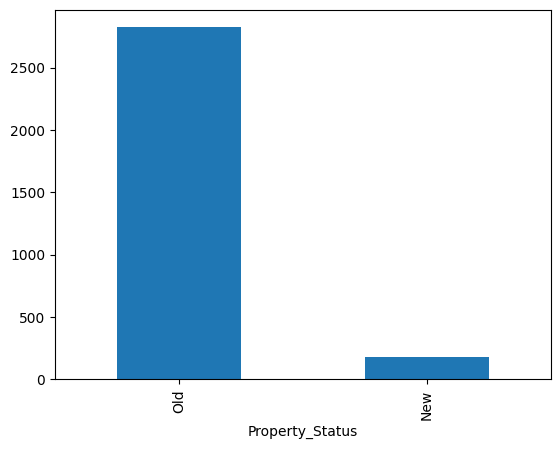

In [49]:
df['Property_Status'].value_counts().plot(kind='bar')

* There are more numbers of old property compare to new property.
* Highest number of old property are more than 2500.

<Axes: ylabel='count'>

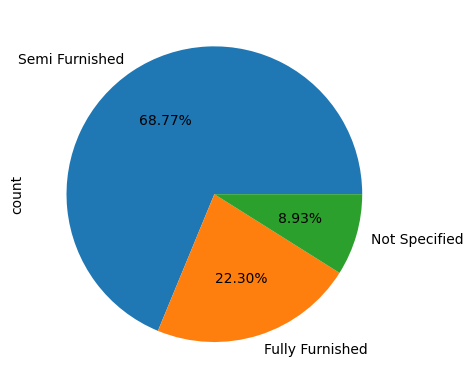

In [50]:
df['Furnishing'].value_counts().plot(kind='pie', autopct = '%.2f%%')

* There are more number of semi furnished property compares to others.
* The highest furnishing percentage is 68.77%.

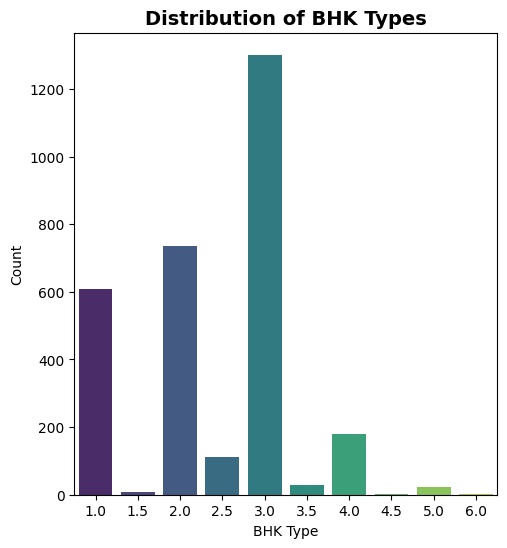

In [51]:
plt.figure(figsize=(12, 6))
bhk_counts = df['BHK_Type'].value_counts().sort_index()
plt.subplot(1, 2, 1)
sns.countplot(x='BHK_Type', data=df, order=sorted(df['BHK_Type'].unique()), palette='viridis')
plt.title('Distribution of BHK Types', fontsize=14, fontweight='bold')
plt.xlabel('BHK Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

* There are more 3BHK flat comapares to others.
* The lowest type is 1.5BHK

Text(0, 0.5, 'Count')

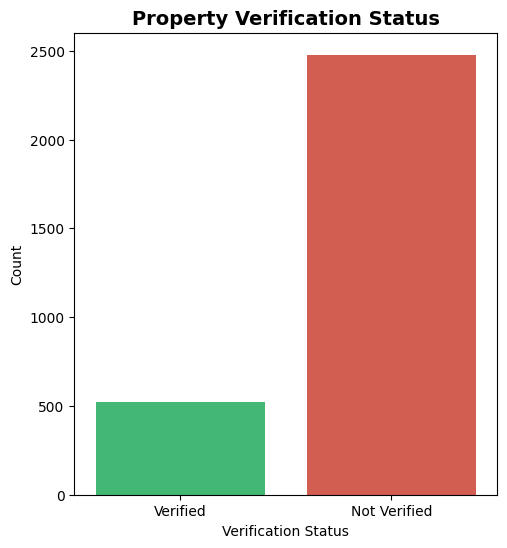

In [52]:
plt.figure(figsize=(12, 6))
verification_counts = df['Property_Verification'].value_counts()
plt.subplot(1, 2, 1)
sns.countplot(x='Property_Verification', data=df, palette=['#2ecc71', '#e74c3c'])
plt.title('Property Verification Status', fontsize=14, fontweight='bold')
plt.xlabel('Verification Status')
plt.ylabel('Count')

* There are more Non-Verified property are present.
* Around 2400 property are not verified. 

<Axes: ylabel='Frequency'>

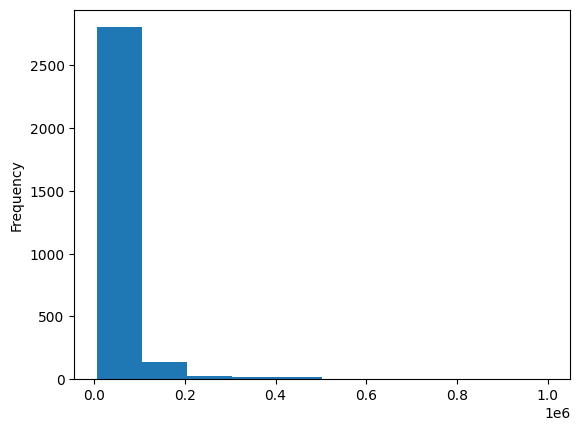

In [53]:
df['Rent_Price'].plot(kind='hist')

* Maximum rent price is more than 2500.
* More number of rent price property are between 0.0 to 0.2.

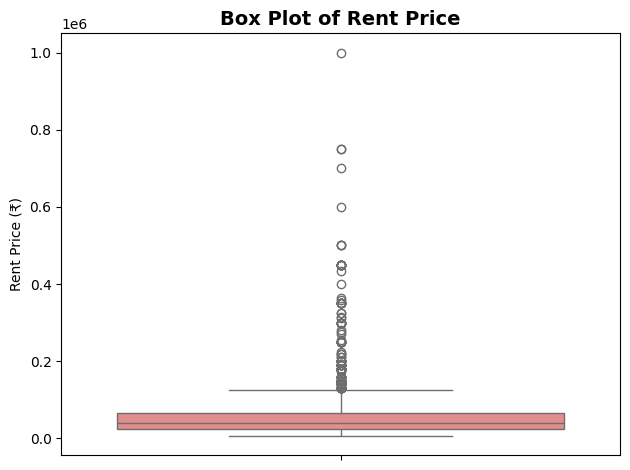

In [54]:
sns.boxplot(y=df['Rent_Price'], color='lightcoral')
plt.title('Box Plot of Rent Price', fontsize=14, fontweight='bold')
plt.ylabel('Rent Price (₹)')
plt.tight_layout()
plt.show()

* Outliers are present.
* Outliers is present near 1.
* Lowest price is around 0.
* It's a right skewed data.
* Median is between 0.0 and 0.1

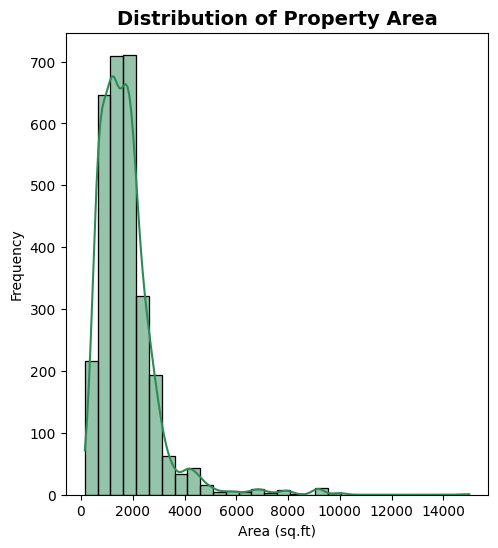

In [55]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Property_Area_In_sqft'], bins=30, kde=True, color='seagreen')
plt.title('Distribution of Property Area', fontsize=14, fontweight='bold')
plt.xlabel('Area (sq.ft)')
plt.ylabel('Frequency')
plt.show()

* Highest area of property are present between 1000 to 3000.
* Less area is between 8000 to 10000.
* Around 700 property is having more area (sq.ft) of 2000 - 3000.

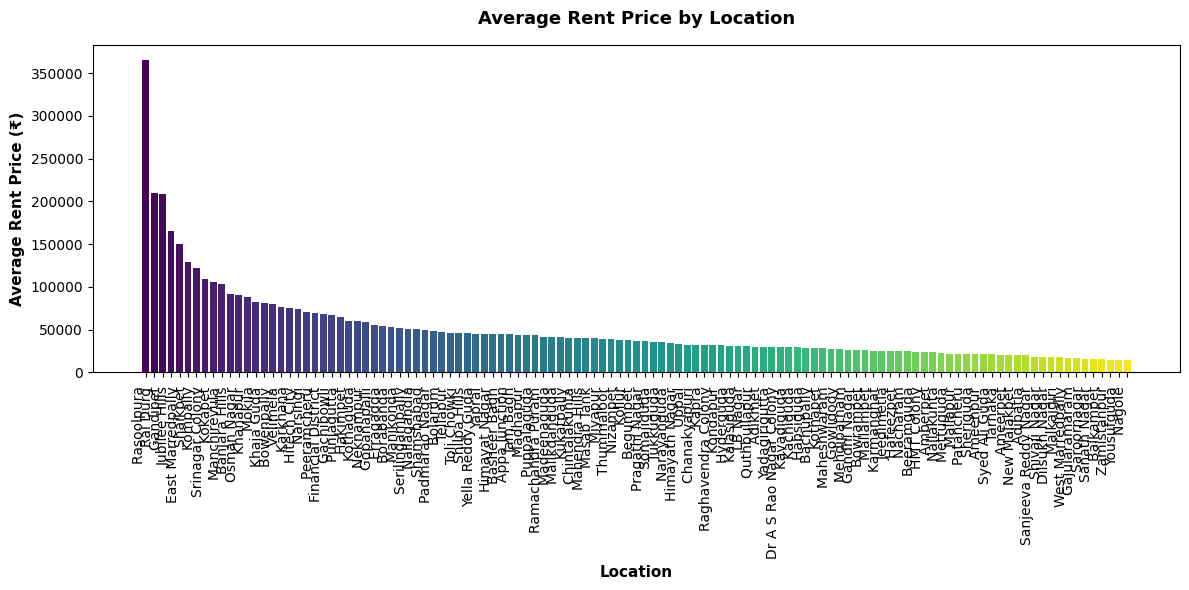

In [112]:
plt.figure(figsize=(12, 6))
# plt.subplot(1, 3, 1)
location_rent = df.groupby('location')['Rent_Price'].mean().sort_values(ascending=False)
bars = plt.bar(range(len(location_rent)), location_rent.values, color=sns.color_palette("viridis", len(location_rent)))
plt.xticks(range(len(location_rent)), location_rent.index, rotation=45, ha='right')
plt.ylabel('Average Rent Price (₹)', fontsize=11, fontweight='bold')
plt.xlabel('Location', fontsize=11, fontweight='bold')
plt.title('Average Rent Price by Location', fontsize=13, fontweight='bold', pad=15)

plt.xticks(rotation=90, ha='right')
plt.tight_layout()

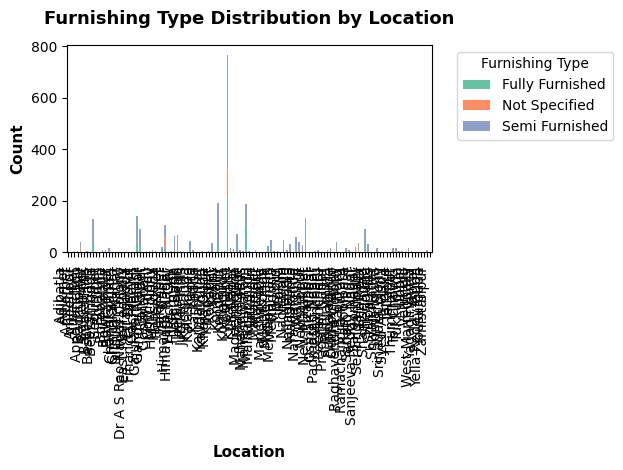

In [83]:
# 2. Furnishing Type based on Location (Stacked Bar Chart)
furnishing_location = pd.crosstab(df['location'], df['Furnishing'])
furnishing_location.plot(kind='bar', stacked=True, ax=plt.gca(), 
                          color=sns.color_palette("Set2", len(furnishing_location.columns)))
plt.ylabel('Count', fontsize=11, fontweight='bold')
plt.xlabel('Location', fontsize=11, fontweight='bold')
plt.title('Furnishing Type Distribution by Location', fontsize=13, fontweight='bold', pad=15)
plt.legend(title='Furnishing Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

In [113]:
df1 = df.head(7)

In [114]:
df1

,Property_Name,Rent_Price,Property_Area_In_sqft,Furnishing,Post_Status,Property_Verification,Property_Status,Owner_Name,BHK_Type,location
0,2.5 BHK Flat for rent in Tellapur,44500,1305,Semi Furnished,1d ago,Verified,New,Suchitha,2.5,Tellapur
1,1 BHK Flat for rent in Madhapur,26000,800,Fully Furnished,2d ago,Verified,Old,Ravi Kumar,1.0,Madhapur
2,3 BHK Flat for rent in Serilingampally,60000,1490,Semi Furnished,1m ago,Verified,Old,Ochroncvr,3.0,Serilingampally
3,2 BHK Flat for rent in Narsingi,49998,1370,Semi Furnished,5d ago,Verified,Old,SYNERGY CONSULTANTS,2.0,Narsingi
4,1 BHK Flat for rent in Madhapur,26000,950,Fully Furnished,1w ago,Verified,Old,Vicky Ram,1.0,Madhapur
5,2 BHK Flat for rent in Himayath Nagar,18500,1200,Semi Furnished,1d ago,Not Verified,New,A S Real Estates,2.0,Himayath Nagar
6,2 BHK Flat for rent in Gowlidody,28200,1200,Fully Furnished,1d ago,Verified,Old,Ratna J\t,2.0,Gowlidody


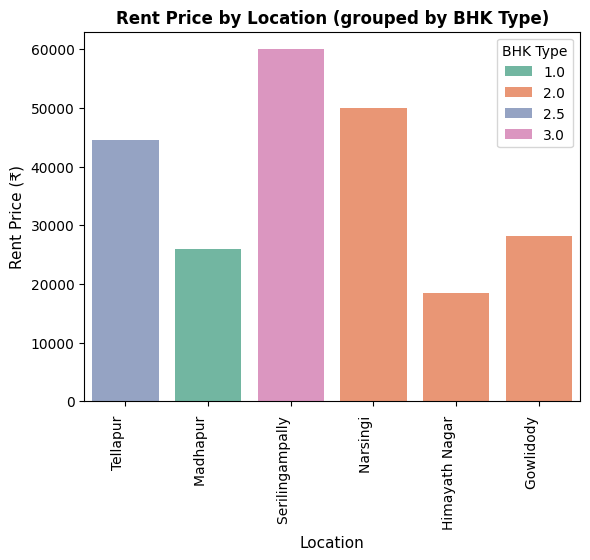

In [115]:
sns.barplot(data=df1, x='location', y='Rent_Price', hue='BHK_Type', palette='Set2')
plt.xlabel('Location', fontsize=11)
plt.ylabel('Rent Price (₹)', fontsize=11)
plt.title('Rent Price by Location (grouped by BHK Type)', fontsize=12, fontweight='bold')
plt.xticks(rotation=90, ha='right')
plt.legend(title='BHK Type')

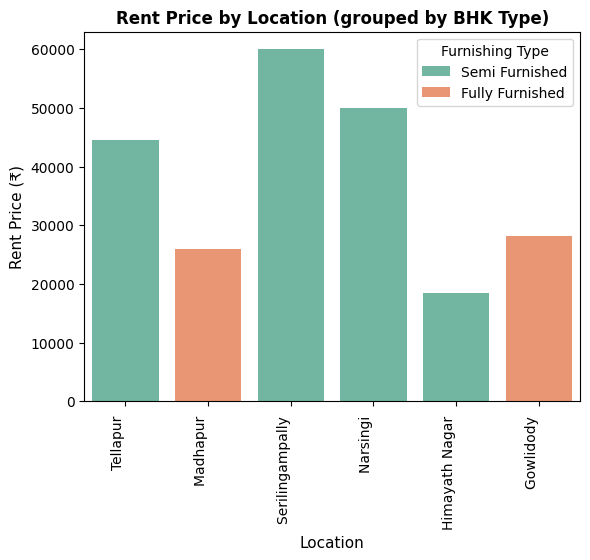

In [117]:
sns.barplot(data=df1, x='location', y='Rent_Price', hue='Furnishing', palette='Set2')
plt.xlabel('Location', fontsize=11)
plt.ylabel('Rent Price (₹)', fontsize=11)
plt.title('Rent Price by Location (grouped by BHK Type)', fontsize=12, fontweight='bold')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Furnishing Type')

# Bi-variate Analysis

##### plt.figure(figsize=(12, 6))
sns.scatterplot(x='Property_Area_In_sqft', y='Rent_Price', data=df, alpha=0.6, color='darkblue')
plt.title('Rent Price vs Property Area', fontsize=14, fontweight='bold')
plt.xlabel('Area (sq.ft)')
plt.ylabel('Rent Price (₹)')
plt.show()

* Outliers is present near 13000.
* Highest area sqft is between 0 - 3500sqft.
* It is a right skewed data.

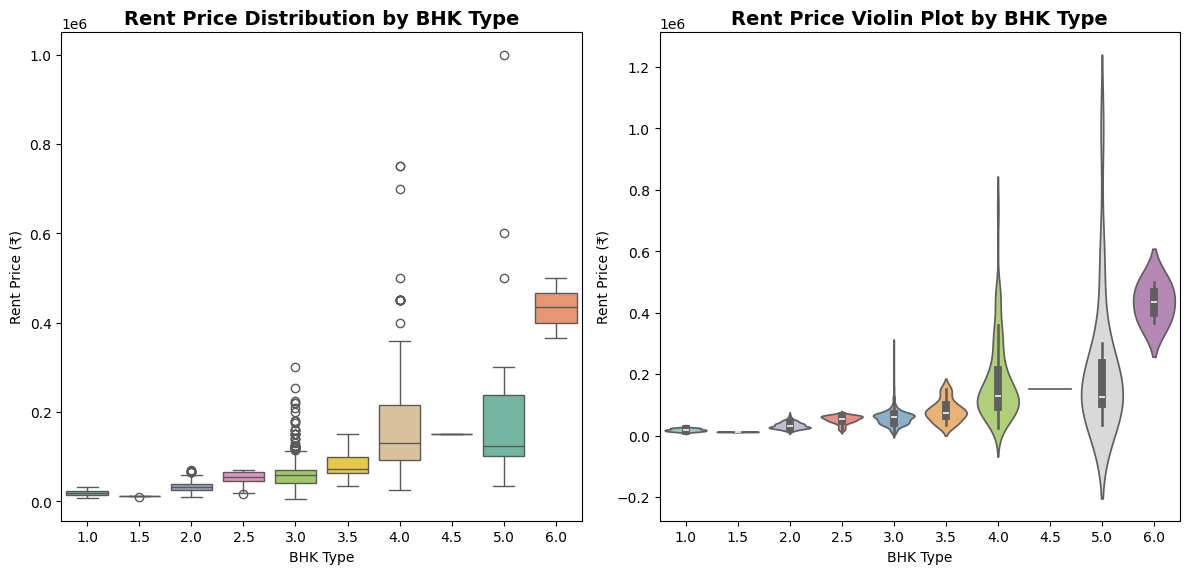

In [56]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='BHK_Type', y='Rent_Price', data=df, palette='Set2')
plt.title('Rent Price Distribution by BHK Type', fontsize=14, fontweight='bold')
plt.xlabel('BHK Type')
plt.ylabel('Rent Price (₹)')
plt.subplot(1, 2, 2)
sns.violinplot(x='BHK_Type', y='Rent_Price', data=df, palette='Set3')
plt.title('Rent Price Violin Plot by BHK Type', fontsize=14, fontweight='bold')
plt.xlabel('BHK Type')
plt.ylabel('Rent Price (₹)')
plt.tight_layout()
plt.show()

* No outliers in 1, 3.5 and 4.5 BHK flats.
* More number of outliers are present for 3 BHK Flats.
* Highest outlier is lies near 1.
* Lowest rent price is around 0.
* Highest rent price is betweeen 0.4 and 0.6 

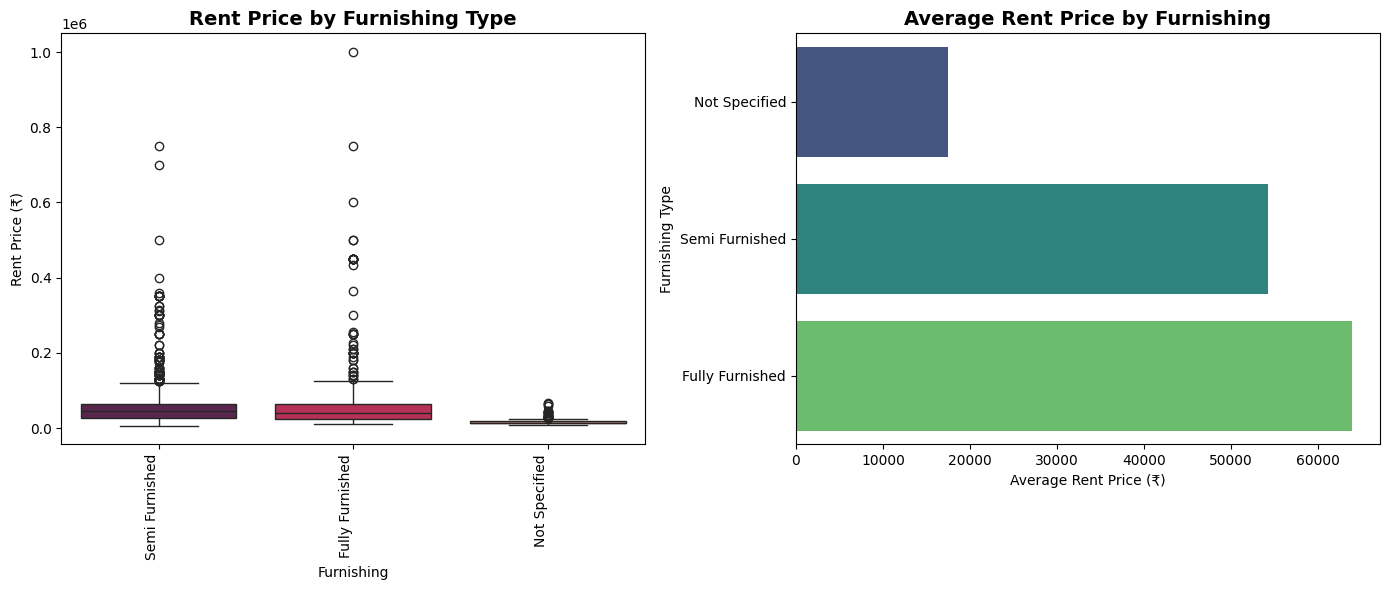

In [57]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Furnishing', y='Rent_Price', data=df, palette='rocket')
plt.title('Rent Price by Furnishing Type', fontsize=14, fontweight='bold')
plt.xlabel('Furnishing')
plt.ylabel('Rent Price (₹)')
plt.xticks(rotation=90, ha='right')

plt.subplot(1, 2, 2)
furnishing_avg = df.groupby('Furnishing')['Rent_Price'].mean().sort_values()
sns.barplot(x=furnishing_avg.values, y=furnishing_avg.index, palette='viridis')
plt.title('Average Rent Price by Furnishing', fontsize=14, fontweight='bold')
plt.xlabel('Average Rent Price (₹)')
plt.ylabel('Furnishing Type')
plt.tight_layout()
plt.show()

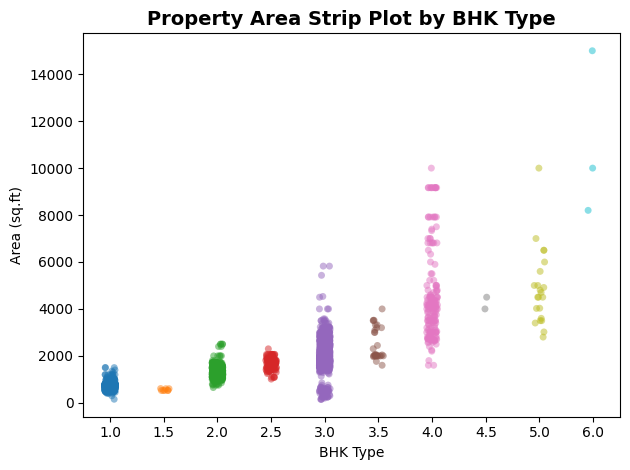

In [58]:
sns.stripplot(x='BHK_Type', y='Property_Area_In_sqft', data=df, alpha=0.5, palette='tab10')
plt.title('Property Area Strip Plot by BHK Type', fontsize=14, fontweight='bold')
plt.xlabel('BHK Type')
plt.ylabel('Area (sq.ft)')
plt.tight_layout()
plt.show()

* 6 BHKL Flat is having the highest Area (sq.ft) property.
* 1.5 BHK is having less area.
* Outlier is present near 15000.

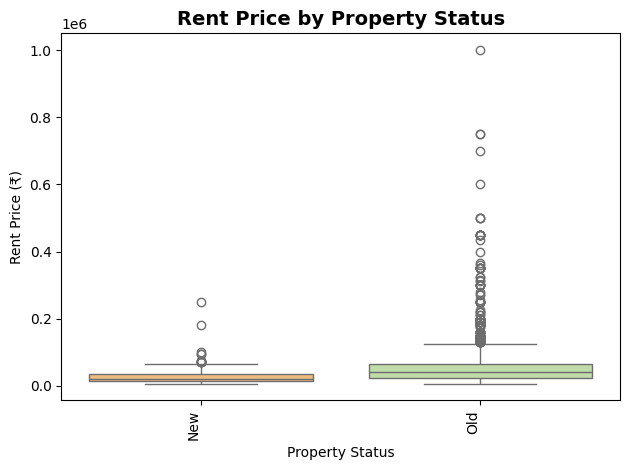

In [59]:
sns.boxplot(x='Property_Status', y='Rent_Price', data=df, palette='Spectral')
plt.title('Rent Price by Property Status', fontsize=14, fontweight='bold')
plt.xlabel('Property Status')
plt.ylabel('Rent Price (₹)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Multi-Variate Analysis

<Axes: >

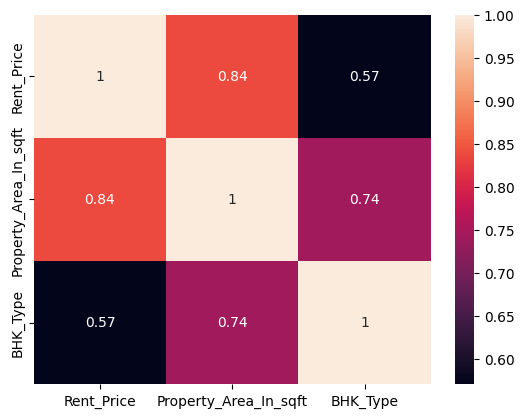

In [60]:
sns.heatmap(df.corr(numeric_only=True, method='pearson'), annot=True)

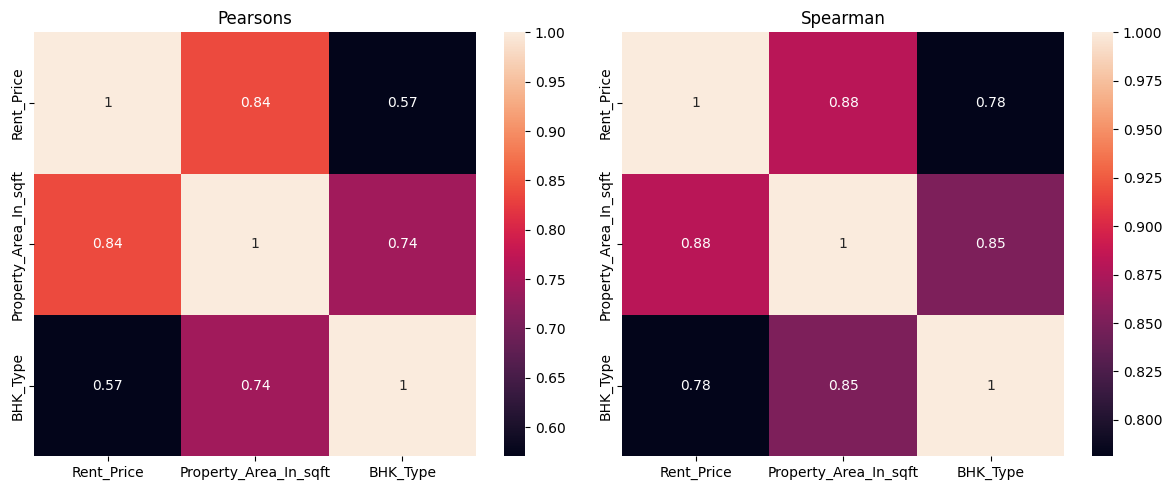

In [61]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Pearsons')
sns.heatmap(df.corr(numeric_only=True), annot=True)

plt.subplot(122)
plt.title('Spearman')
sns.heatmap(df.corr(numeric_only=True, method='spearman'), annot=True)

plt.tight_layout()

In [62]:
df.head(3)

,Property_Name,Rent_Price,Property_Area_In_sqft,Furnishing,Post_Status,Property_Verification,Property_Status,Owner_Name,BHK_Type
0,2.5 BHK Flat for rent in Tellapur,44500,1305,Semi Furnished,1d ago,Verified,New,Suchitha,2.5
1,1 BHK Flat for rent in Madhapur,26000,800,Fully Furnished,2d ago,Verified,Old,Ravi Kumar,1.0
2,3 BHK Flat for rent in Serilingampally,60000,1490,Semi Furnished,1m ago,Verified,Old,Ochroncvr,3.0


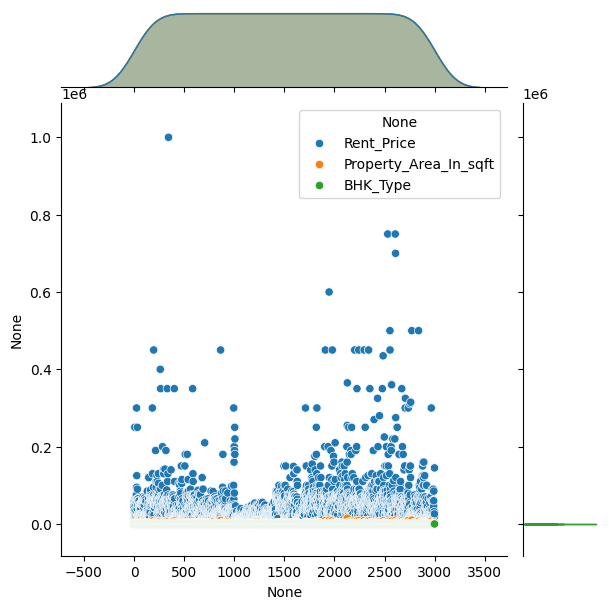

In [63]:
sns.jointplot(df)

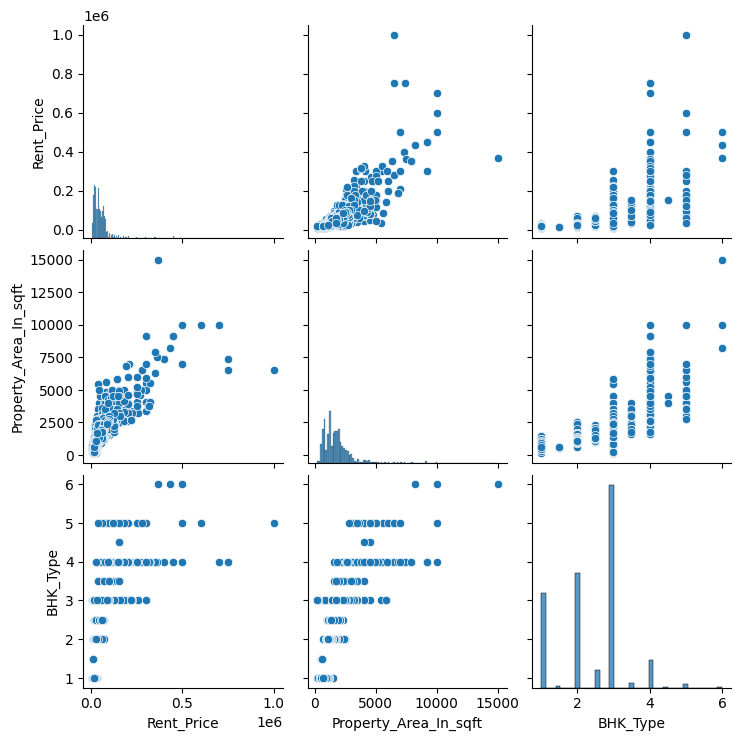

In [64]:
sns.pairplot(df)    # Histogram + ScatterPlot

<Axes: xlabel='Property_Area_In_sqft', ylabel='Rent_Price'>

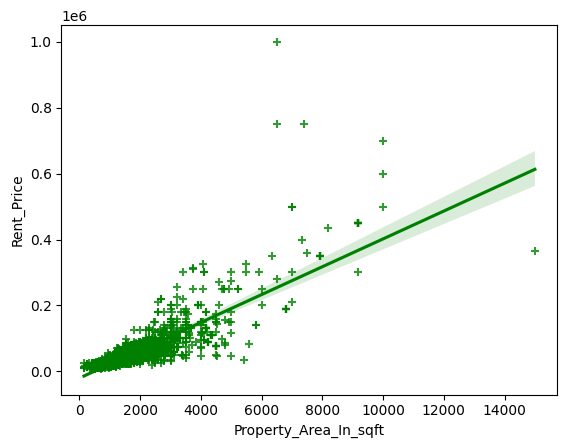

In [65]:
sns.regplot(data=df, x='Property_Area_In_sqft', y='Rent_Price', color='green', marker='+')